![](https://neuroendoimmune.files.wordpress.com/2014/03/snp.png)
![](http://foreign.macrogen.co.kr/eng/images/business/img/ngs_exome_sequencing.gif)
![](http://www.labtimes.org/labtimes/method/methods/img/2010_01a.gif)
**SNP (Single nucleotide polymorphism)**

In [16]:
# 1001 Genomes
# A Catalog of Arabidopsis thaliana Genetic Variation.
# http://1001genomes.org/data/GMI-MPI/releases/v3.1/SNP_matrix_imputed_hdf5/
import h5py
import numpy

In [5]:
f = h5py.File('../1001arabi/1001_SNP_MATRIX/imputed_snps_binary.hdf5')

In [11]:
# Coordinates for At1g01070.1
start_pos = 38752
end_pos   = 40944

# Get all SNP positions for all chromosomes (len=10709949)
positions = f['positions'][:]

# Array of tupels with start/stop indices for each chromosome
chr_regions = f['positions'].attrs['chr_regions']
indices_for_chr1 = chr_regions[0]

# Subset positions for SNPs on Chr1
positions_on_chr1 = positions[indices_for_chr1[0]:indices_for_chr1[1]]

In [12]:
positions_on_chr1

array([      55,       56,       63, ..., 30427613, 30427616, 30427620],
      dtype=int32)

In [13]:
chr_regions

array([[       0,  2597825],
       [ 2597825,  4466694],
       [ 4466694,  6661059],
       [ 6661059,  8428147],
       [ 8428147, 10709949]])

In [23]:
m1 = positions_on_chr1 >= start_pos
m2 = positions_on_chr1 <= end_pos

In [24]:
idx_start_pos, idx_end_pos = (m1 & m2).nonzero()[0] [[0,-1]]

In [25]:
snps_in_region = f['snps'][idx_start_pos:idx_end_pos]

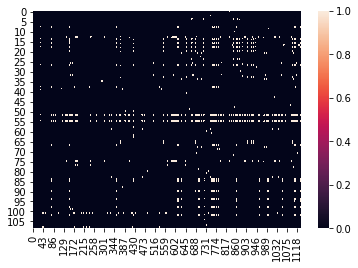

In [28]:
%matplotlib inline
import seaborn as sb
sb.heatmap(snps_in_region)

In [29]:
snps_in_region.shape

(109, 1135)

In [30]:
idx_start_pos,idx_end_pos

(2014, 2123)

In [1]:
import pandas as pd
df_dna = pd.read_csv('./genotype_dna_matrix.txt',header=None)

In [2]:
df_dna.head()

,0,1,2,3,4,5,6,7,8,9,...,321,322,323,324,325,326,327,328,329,330
0,A,G,G,C,G,A,G,G,G,G,...,T,A,T,G,A,A,T,N,G,T
1,A,G,G,C,G,A,G,G,G,G,...,T,A,T,G,A,A,N,C,G,T
2,A,G,G,C,G,A,N,G,G,G,...,T,A,T,G,A,A,T,C,G,T
3,A,G,G,C,N,A,G,G,G,G,...,N,N,N,N,N,N,T,C,A,C
4,G,G,G,C,G,A,G,G,G,G,...,N,N,N,N,N,N,T,C,A,C


In [4]:
import numpy as np
def num(x):
    dic = {'A':1, 'T':2, 'G':3, 'C':4,'N':0}
    return dic[x]
numv = np.vectorize(num)

In [6]:
dna_num = numv(df_dna.values)

In [7]:
dna_num.shape

(1135, 331)

In [8]:
from sklearn.preprocessing import scale

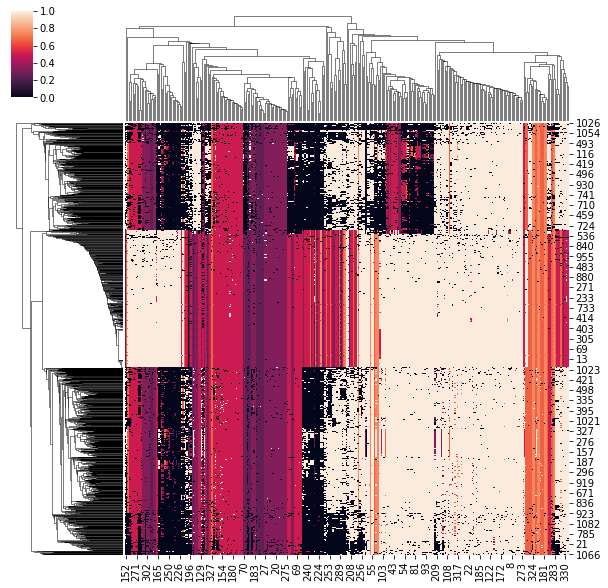

In [26]:
%matplotlib inline
import seaborn as sb
sb.clustermap(dna_num,standard_scale=1)

In [25]:
# http://koreansoyabase.org/Data_Resource/Validation_data_set_genotyped_from_the_222_soybean_samples.xlsx
# 콩 유전체 정보를 통해 콩의 족보를 추정해보자 

In [6]:
%matplotlib inline
import seaborn as sb
import pandas as pd
import numpy as np

In [7]:
df_soy = pd.read_csv('/home/k821209/common/db/soybean_gt_sample.csv')

In [8]:
df_soy.head()

,Chromosome (Glyma1),Physical position (Glyma1),Bangsa-a,Bangsa-b,Bangsa-c,Cheongja-a,Cheongja-b,Daeheug-a,Daeheug-b,Daepung-a,Daepung-b,Daewon-a,Daewon-b,Danbaeg-a,Danbaeg-b,Galchae-a,Galchae-b,Geomjeongol-a,Geomjeongol-b,Hannam-a
0,Gm01,31308,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT,TT
1,Gm01,34199,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC
2,Gm01,46209,GG,GG,GG,GG,GG,GA,GA,GG,GG,GA,GA,GG,GG,GG,GG,GG,GG,GA
3,Gm01,56113,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC,CC
4,Gm01,61067,AA,AA,AA,AA,AA,GG,GG,AA,AA,GG,GG,AA,AA,AA,AA,AA,AA,GG


In [9]:
def num_alleles(x):
    dic = {'A':1, 'T':2, 'G':3, 'C':4,'N':0}
    alleles = list(x)
    alleles.sort()
    num_alleles = ''.join([str(dic[i]) for i in alleles])   
    return int(num_alleles,5)

In [10]:
vnum_alleles = np.vectorize(num_alleles)

In [11]:
data = vnum_alleles(df_soy[df_soy.columns[2:]].values)

In [12]:
data_sample = data.T

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA(n_components=10)

In [18]:
data_sample_pca = pca.fit_transform(data_sample)

In [19]:
data_sample_pca.shape

(18, 10)

In [13]:
y = df_soy.columns[2:]

In [20]:
df_soy_num = pd.DataFrame(data=data_sample_pca,index=y)

In [21]:
df_soy_num.head()

,0,1,2,3,4,5,6,7,8,9
Bangsa-a,977.917062,-329.957933,-394.557468,-57.678344,-453.454685,138.823986,73.367586,-80.645095,-210.826272,-20.628030
Bangsa-b,1002.978248,-350.439510,-412.768783,-60.928892,-483.733331,154.192572,82.074391,-88.603362,438.786030,46.480011
Bangsa-c,972.902843,-329.294405,-388.584808,-58.256565,-450.475792,139.560016,74.754930,-83.675543,-244.497804,-29.256321
Cheongja-a,-673.820609,-57.013693,-144.143699,56.888883,35.296697,-187.988425,1035.197309,-104.126303,58.759037,13.338217
Cheongja-b,-640.927349,-57.864058,-134.057510,55.342208,34.452935,-168.787767,934.241861,-118.808755,-62.805056,-18.450704


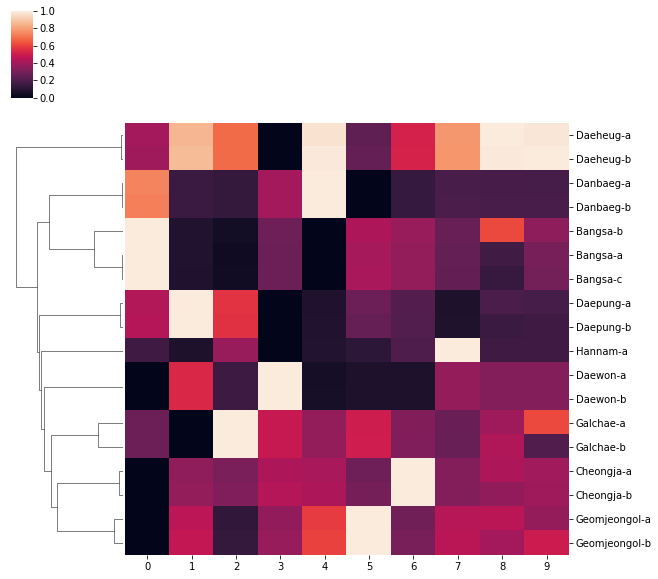

In [24]:
sb.clustermap(df_soy_num,standard_scale=0,col_cluster=False)

![](http://cfile202.uf.daum.net/image/135E9C014B4977904AA3F6)
![](http://cfile210.uf.daum.net/image/155BAC35516E01F3243CDA)

In [29]:
# DNA alignment